# Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

**Basic Analysis of Stock Information**

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/home/jarturomora/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# List of stock symbols to analyse
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # One year after Today

In [3]:
# Create a data frame with the stock information of each symbol.
# I used a dictionary comprehension instead of a foor-loop and global variables as proposed in the course.
symbols = {stock:DataReader(stock, 'yahoo', start, end) for stock in tech_list}

In [4]:
# Accessing stock information about AAPL.
symbols['AAPL'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-26,132.600006,132.910004,129.119995,129.619995,70697600,127.019145
2015-05-27,130.339996,132.259995,130.050003,132.039993,45833200,129.390586
2015-05-28,131.860001,131.949997,131.100006,131.779999,30733300,129.135808
2015-05-29,131.229996,131.449997,129.899994,130.279999,50884500,127.665906
2015-06-01,130.279999,131.389999,130.050003,130.539993,32112800,127.920684


In [5]:
symbols['AAPL'].describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,111.080436,112.138492,109.881191,111.011349,4.810508e+07,109.593738
std,11.015389,10.908176,11.072612,10.954401,2.094875e+07,10.300780
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,101.812502,102.715002,100.832498,102.162502,3.361170e+07,101.444591
50%,111.359996,112.339996,109.845001,111.469997,4.419670e+07,110.055859
75%,118.132502,119.364999,117.175001,118.525001,5.570685e+07,117.016834
max,132.850006,132.970001,131.100006,132.070007,1.622063e+08,129.419998


In [6]:
symbols['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-05-26 to 2016-05-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


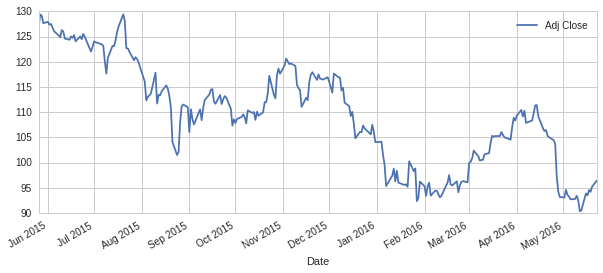

In [7]:
# Quick graphical analysis
symbols['AAPL']['Adj Close'].plot(legend = True, figsize = (10, 4))

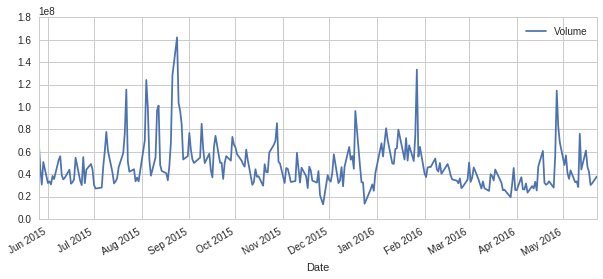

In [8]:
symbols['AAPL']['Volume'].plot(legend = True, figsize = (10, 4))

**Analysis of Moving Averages (MA)**


In [9]:
# We define a list for the moving averages we want to work with
ma_day = [10, 20, 50]

# We will work wit the Apple (APPL) symbol
# We add a new column for each MA
for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    # We calculate the "rolling mean" for the series of each MA
    # http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html
    symbols["AAPL"][column_name] = pd.rolling_mean(symbols["AAPL"]['Adj Close'], ma)

/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


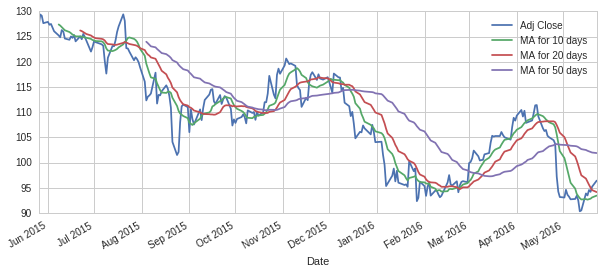

In [10]:
symbols["AAPL"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (10, 4), subplots = False)

**Daily Return**

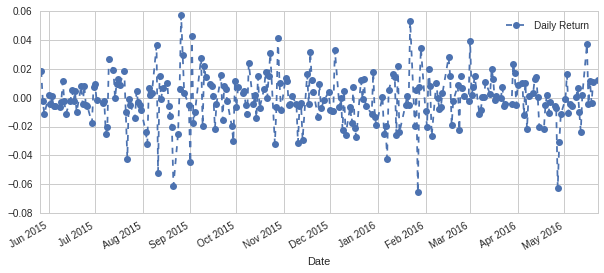

In [11]:
# We add a new column to calculate the daily return of AAPL
symbols['AAPL']['Daily Return'] = symbols['AAPL']['Adj Close'].pct_change()

# Plot of daily return
symbols['AAPL']['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

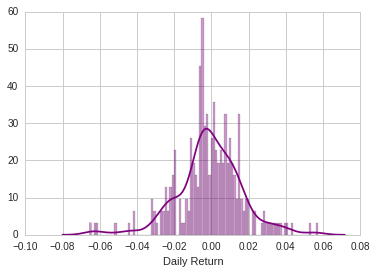

In [12]:
sns.distplot(symbols['AAPL']['Daily Return'].dropna(), bins = 100, color = 'purple')

**Closing Stock Price and Return for Stocks**

In [13]:
# We create a new data frame with the closing information
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [14]:
closing_df.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2015-05-26,127.019145,425.470001,547.190002,45.330101
2015-05-27,129.390586,431.420013,554.250000,46.322518
2015-05-28,129.135808,426.570007,554.179993,46.166845
2015-05-29,127.665906,429.230011,545.320007,45.592800
2015-06-01,127.920684,430.920013,549.210022,45.952793


In [26]:
# Now we create a dataframe for the return of each stock
tech_rets = closing_df.pct_change()

In [16]:
type(closing_df).__name__

'DataFrame'

In [17]:
tech_rets.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2015-05-26,NaN,NaN,NaN,NaN
2015-05-27,0.018670,0.013985,0.012902,0.021893
2015-05-28,-0.001969,-0.011242,-0.000126,-0.003361
2015-05-29,-0.011383,0.006236,-0.015988,-0.012434
2015-06-01,0.001996,0.003937,0.007133,0.007896


In [18]:
tech_rets.describe()

,AAPL,AMZN,GOOGL,MSFT
count,251.000000,251.000000,251.000000,251.000000
mean,-0.000941,0.002206,0.001250,0.000537
std,0.017678,0.022013,0.018823,0.017042
min,-0.065707,-0.076100,-0.054141,-0.071710
25%,-0.009161,-0.009259,-0.008261,-0.009168
50%,-0.001067,0.001534,0.001223,0.000841
75%,0.009252,0.012444,0.009108,0.007904
max,0.057355,0.097972,0.162584,0.100770


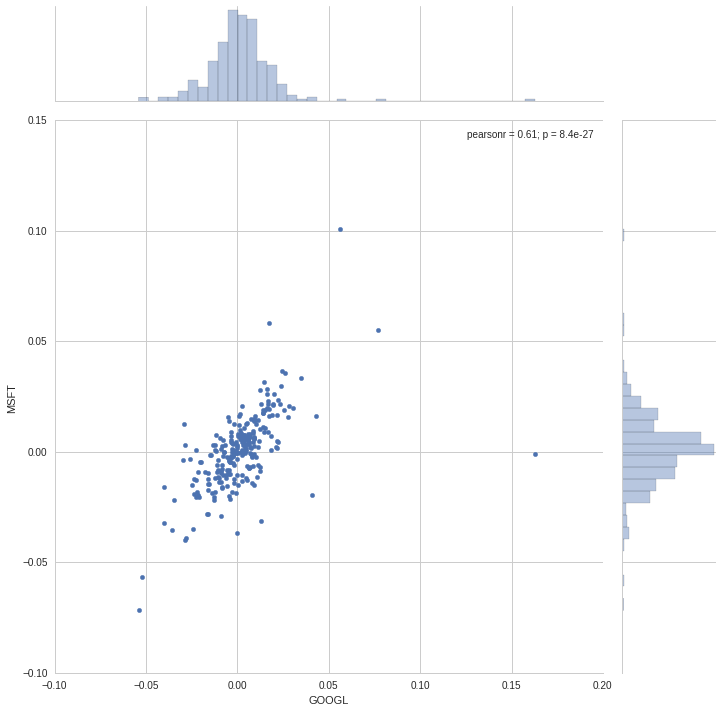

In [19]:
# Comparing return of stock of two companies
sns.jointplot(x = 'GOOGL', y= 'MSFT', data = tech_rets, kind = 'scatter', size = 10)

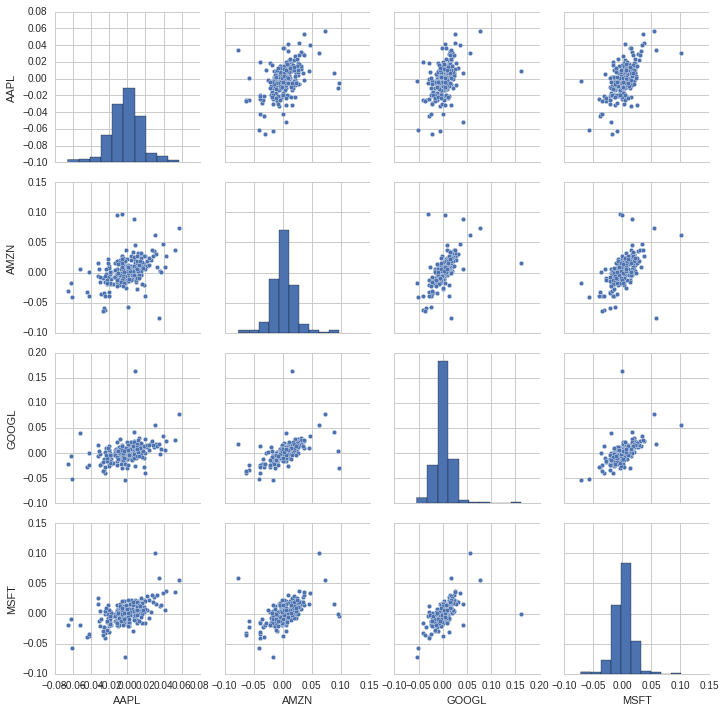

In [20]:
# Analysing correlation between all companies
sns.pairplot(tech_rets.dropna())

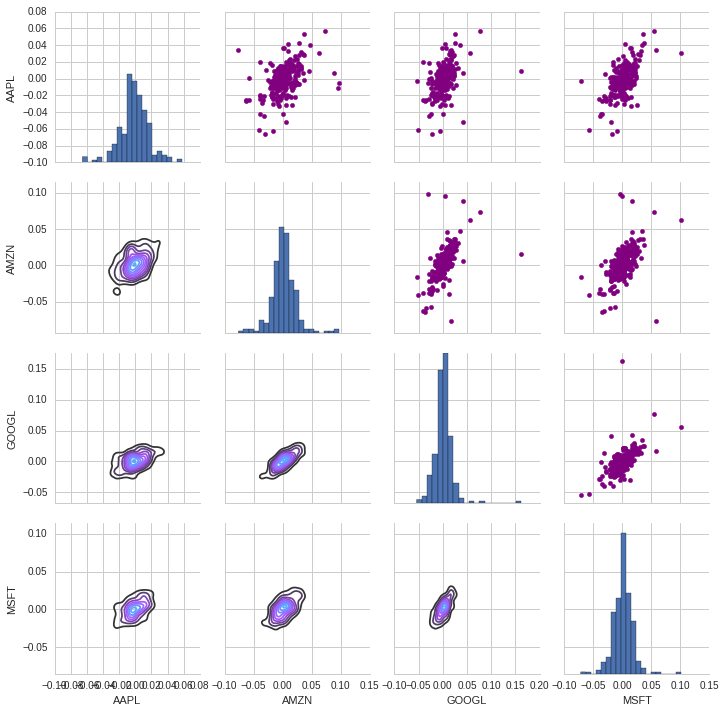

In [21]:
# Creating a personalized pair plot
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple') # The upper plots
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d') # The lower plots
returns_fig.map_diag(plt.hist, bins = 20) # The diagonal plot

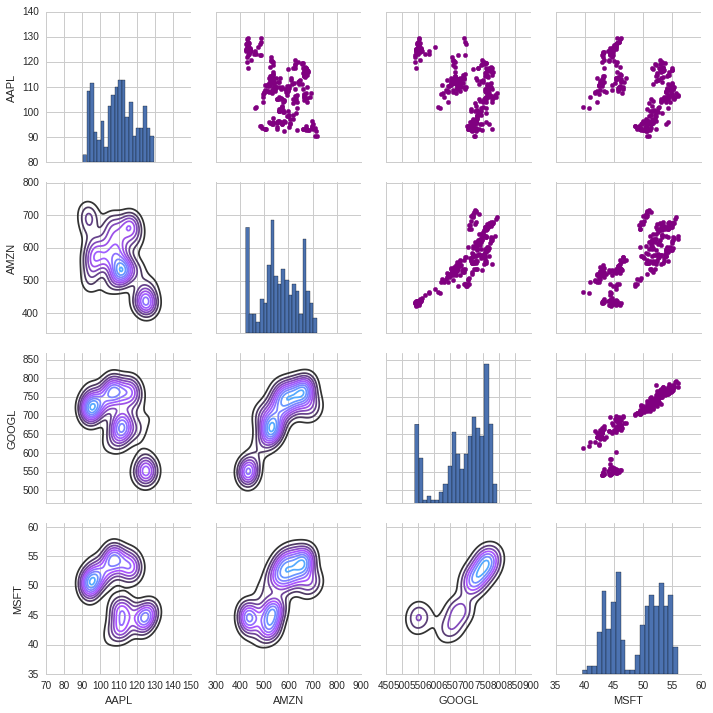

In [22]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple') # The upper plots
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d') # The lower plots
returns_fig.map_diag(plt.hist, bins = 20) # The diagonal plot

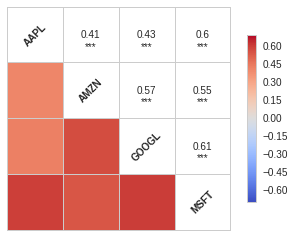

In [25]:
sns.corrplot(tech_rets.dropna(), annot = True)

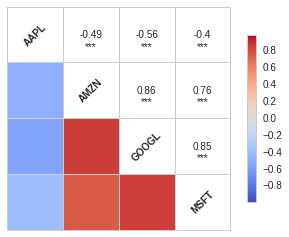

In [24]:
sns.corrplot(closing_df)

**Risk Analysis**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [27]:
# We create a dataset for the risk analysis using based on the closing values
rets = tech_rets.dropna()

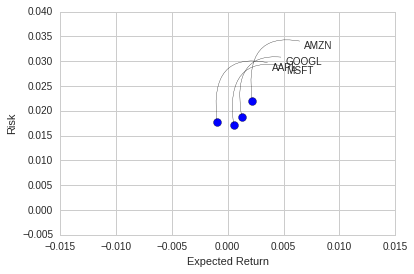

In [34]:
# Now we will create a scatter plot with some fancy labels
area = np.pi * 20 # Radious of the plot's dots.

plt.scatter(rets.mean(), rets.std(), s = area) # We create the scatter plot for the risk analysis.

# Axis labels
plt.xlabel("Expected Return")
plt.ylabel("Risk")

# Now the fancy labels
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (80, 50),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-", connectionstyle = "arc3, rad = 0.8")
    )

**Value at Risk**

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

**Method 1: Value at risk using the "bootstrap"**

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

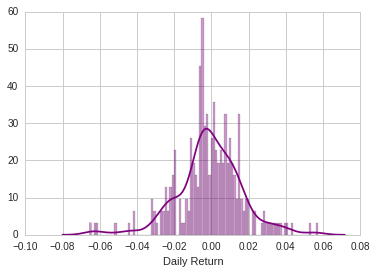

In [39]:
# Value at risk for AAPL
sns.distplot(symbols['AAPL']['Daily Return'].dropna(), bins = 100, color = 'purple')

In [40]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.028138853472663872

From the calculation above (it can change dependending on the day this script is ran) the _0.05 empirical quantile_ of daily returns is at **-0.028**. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * \$1,000,000 = $28,000.

**Method 2: Value at Risk Using the Monte Carlo Method**

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

In [43]:
# Analysis for Google Value Risk

# Time horizon
days = 365

# Delta
dt = 1/days

# Now grab the mu (average) from the expected return data we got from GOOGL
mu = rets['GOOGL'].mean()

# Now we calculate the standard deviation
sigma = rets['GOOGL'].mean()

In [44]:
def stock_monte_carlo(start_price, days, mu, sigma):
    """This function simulates a prices array using the Monte Carlo Method"""
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift for Monte Carlo
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1, days):
        # Calculate shock
        # NOTE: We use random normal due to the stock distribution
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))        
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate simulated price
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] +  shock[x]))
    return price

In [45]:
symbols['GOOGL'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-26,552.580017,553.330017,542.969971,547.190002,1873700,547.190002
2015-05-27,548.679993,555.289978,546.580017,554.250000,1742200,554.250000
2015-05-28,553.789978,555.760010,550.799988,554.179993,1177200,554.179993
2015-05-29,553.200012,553.940002,545.039978,545.320007,2172300,545.320007
2015-06-01,548.729980,550.570007,543.580017,549.210022,1660500,549.210022


In [50]:
symbols['GOOGL']['Open'][0]

552.580017

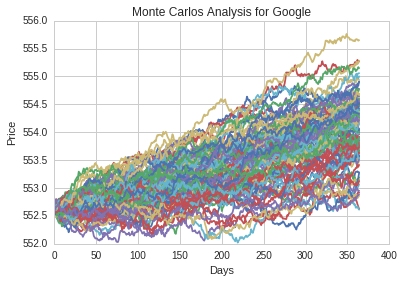

In [51]:
start_price = symbols['GOOGL']['Open'][0] # The first open price in our dataframe

# Now put the Monte Carlo simulation in action with 100 iterations
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlos Analysis for Google")

In [52]:
# Risk Analysis
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold = 5)

# Run the simulation and take only the end price data to create an histogram for further analysis
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

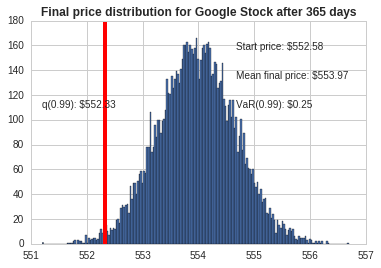

In [53]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins = 200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth = 4, color = 'r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold');

Base on the current data, now we have looked at the 1% empirical quantile of the final price distribution to estimate the **Value at Risk** for the Google stock, which looks to be \$0.25 (VaR[0.99]) for every investment of \$522.58 (the price of one inital Google stock).

This basically menas for every initial stock you purchase your putting about \$18.38 at risk 99% of the time from our Monte Carlo Simulation.